In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4496)

In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
gdp_df.shape

(6870, 4)

In [8]:
internet_df.shape

(4496, 4)

8. Take a look at the datatypes for the columns in each DataFrame.

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

9. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN
4495,footnoteSeqID,Footnote,NaN,NaN


10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [13]:
gdp_df = gdp_df.drop('Value Footnotes',axis=1)

In [14]:
internet_df = internet_df.drop('Value Footnotes',axis=1)

11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [15]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country", "Year":"Year", "Value":"GDP_Per_Capita"})

12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [16]:
internet_df = internet_df.rename(columns={"Country or Area":"Country", "Year":"Year", "Value":"Internet_Users_Pct"})

13.  Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [17]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='inner')
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 0 to 3458
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3459 non-null   object 
 1   Year                3459 non-null   object 
 2   GDP_Per_Capita      3458 non-null   float64
 3   Internet_Users_Pct  3458 non-null   float64
dtypes: float64(2), object(2)
memory usage: 135.1+ KB


14. Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [18]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
1,Afghanistan,2013,2116.465454,5.900000
2,Afghanistan,2012,2075.491747,5.454545
3,Afghanistan,2011,1904.559799,5.000000
4,Afghanistan,2010,1957.029338,4.000000


15. Look at the last five rows to make sure the data is clean and as expected.

In [19]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3454,Zimbabwe,1996,3520.430146,0.016790
3455,Zimbabwe,1995,3226.413930,0.007684
3456,Zimbabwe,1994,3263.934978,0.001739
3457,Zimbabwe,1990,3324.348171,0.000000
3458,footnoteSeqID,Footnote,NaN,NaN


16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [20]:
array = ['2004', '2009', '2014']
gdp_and_internet_use = gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin(array)]

In [21]:
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2014     2102.385234            6.390000
5     Afghanistan  2009     1758.904043            3.550000
10    Afghanistan  2004     1200.278256            0.105809
13        Albania  2014    11623.866679           60.100000
18        Albania  2009    10346.864199           41.200000
...           ...   ...             ...                 ...
3419       Zambia  2009     2917.516220            6.310000
3424       Zambia  2004     2261.766537            2.013550
3436     Zimbabwe  2014     2955.240287           19.890000
3441     Zimbabwe  2009     1925.364381           11.360000
3446     Zimbabwe  2004     2480.859342            6.564045

[482 rows x 4 columns]


17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [22]:
gdp_internet_2004 = gdp_and_internet_use[(gdp_and_internet_use.Year == "2004")]

In [23]:
gdp_internet_2009 = gdp_and_internet_use[(gdp_and_internet_use.Year == "2009")]

In [24]:
gdp_internet_2014 = gdp_and_internet_use[(gdp_and_internet_use.Year == "2014")]

In [25]:
print(gdp_internet_2014) 

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
0             Afghanistan  2014     2102.385234                6.39
13                Albania  2014    11623.866679               60.10
34                Algeria  2014    11512.705405               18.09
56                 Angola  2014     8239.828837               21.26
76    Antigua and Barbuda  2014    18104.241470               64.00
...                   ...   ...             ...                 ...
3351              Uruguay  2014    20582.168953               61.46
3373           Uzbekistan  2014     5764.492705               43.55
3394              Vanuatu  2014     3116.077025               18.80
3414               Zambia  2014     3450.046561               17.34
3436             Zimbabwe  2014     2955.240287               19.89

[163 rows x 4 columns]


18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [26]:
gdp_internet_2014['Internet_Users_Pct'].max()

98.16

In [27]:
gdp_internet_2014['Internet_Users_Pct'].idxmax()

1381

In [28]:
gdp_internet_2014.loc[1381]

Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 1381, dtype: object

19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [29]:
gdp_internet_2014['Internet_Users_Pct'].min()

1.14

In [30]:
gdp_internet_2014['Internet_Users_Pct'].idxmin()

3087

In [31]:
gdp_internet_2014.loc[3087]

Country               Timor-Leste
Year                         2014
GDP_Per_Capita         3264.56807
Internet_Users_Pct           1.14
Name: 3087, dtype: object

20. Repeat for 2004 and 2009.

In [32]:
gdp_internet_2009['Internet_Users_Pct'].max()
gdp_internet_2009['Internet_Users_Pct'].idxmax()

1386

In [33]:
gdp_internet_2009.loc[1386]

Country                    Iceland
Year                          2009
GDP_Per_Capita        48177.084123
Internet_Users_Pct            93.0
Name: 1386, dtype: object

In [34]:
gdp_internet_2004['Internet_Users_Pct'].max()
gdp_internet_2004['Internet_Users_Pct'].idxmax()

2985

In [35]:
gdp_internet_2004.loc[2985]

Country                     Sweden
Year                          2004
GDP_Per_Capita        44496.023401
Internet_Users_Pct           83.89
Name: 2985, dtype: object

21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [36]:
gdp_internet_2014['GDP_Per_Capita'].max()
gdp_internet_2014['GDP_Per_Capita'].idxmax()

1798

In [37]:
gdp_internet_2014.loc[1798]

Country                 Luxembourg
Year                          2014
GDP_Per_Capita        108760.91603
Internet_Users_Pct           94.67
Name: 1798, dtype: object

22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [38]:
gdp_internet_2014['GDP_Per_Capita'].min()
gdp_internet_2014['GDP_Per_Capita'].idxmin()

540

In [39]:
gdp_internet_2014.loc[540]

Country                  Burundi
Year                        2014
GDP_Per_Capita        886.235777
Internet_Users_Pct          1.38
Name: 540, dtype: object

23. Create some scatterplots:

a. 2004 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, 'Internet Use and GDP in 2004')

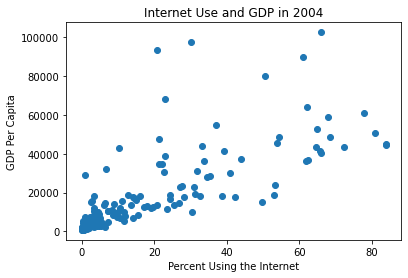

In [40]:
plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title('Internet Use and GDP in 2004')

b. 2009 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, 'Internet Use and GDP in 2009')

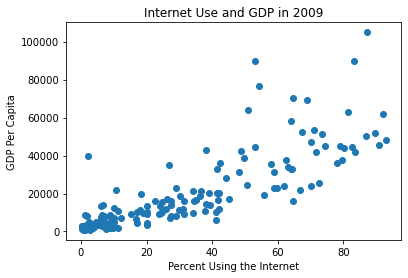

In [41]:
plt.scatter(gdp_internet_2009.Internet_Users_Pct, gdp_internet_2009.GDP_Per_Capita)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title('Internet Use and GDP in 2009')

c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, 'Internet Use and GDP in 2014')

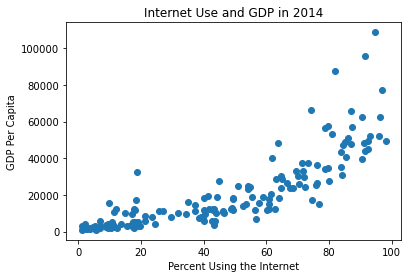

In [42]:
plt.scatter(gdp_internet_2014.Internet_Users_Pct, gdp_internet_2014.GDP_Per_Capita)
plt.xlabel('Percent Using the Internet')
plt.ylabel('GDP Per Capita')
plt.title('Internet Use and GDP in 2014')

24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

The correlation between Internet Use and GDP becomes more linear and develops a stronger corrleation over time. 

25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

(array([74., 32., 23., 10., 13.,  5.,  2.,  1.,  2.,  1.]),
 array([   886.23577678,  11673.70380211,  22461.17182744,  33248.63985277,
         44036.1078781 ,  54823.57590343,  65611.04392876,  76398.51195409,
         87185.97997942,  97973.44800475, 108760.91603008]),
 <BarContainer object of 10 artists>)

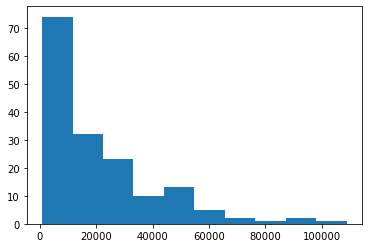

In [43]:
plt.hist(gdp_internet_2014.GDP_Per_Capita)

It is generally unimodal, as it has one main high point. 

26. Look at the distribution of Internet Use for 2014. Is it unimodal?

(array([29., 25.,  7.,  8., 23., 11., 16., 15., 16., 13.]),
 array([ 1.14 , 10.842, 20.544, 30.246, 39.948, 49.65 , 59.352, 69.054,
        78.756, 88.458, 98.16 ]),
 <BarContainer object of 10 artists>)

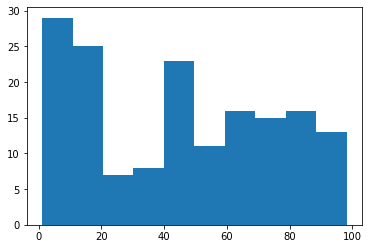

In [44]:
plt.hist(gdp_internet_2014.Internet_Users_Pct)

It is not unimodal. 

27. What are the top 5 countries in terms of internet use in 2014?

In [45]:
gdp_internet_2014.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1381,Iceland,2014,49652.149500,98.16
372,Bermuda,2014,77361.104881,96.80
2296,Norway,2014,62589.373548,96.30
854,Denmark,2014,52214.537753,95.99
1798,Luxembourg,2014,108760.916030,94.67


28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [46]:
filter1 = gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])

In [47]:
filter2 = gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Luxembourg'])

In [48]:
top_5_internet = gdp_and_internet_use[filter1]
top_5_internet = gdp_and_internet_use[filter2]
top_5_internet = top_5_internet.sort_values(by=['Year', 'Country'])

In [49]:
print(top_5_internet)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
382      Bermuda  2004    90195.811033           60.990867
864      Denmark  2004    50607.628971           80.930000
1391     Iceland  2004    45145.545658           83.880000
1808  Luxembourg  2004   102708.212547           65.880000
2306      Norway  2004    60893.410993           77.690000
377      Bermuda  2009    89961.982744           83.250000
859      Denmark  2009    50274.075696           86.840000
1386     Iceland  2009    48177.084123           93.000000
1803  Luxembourg  2009   104932.811953           87.310000
2301      Norway  2009    61886.564498           92.080000
372      Bermuda  2014    77361.104881           96.800000
854      Denmark  2014    52214.537753           95.990000
1381     Iceland  2014    49652.149500           98.160000
1798  Luxembourg  2014   108760.916030           94.670000
2296      Norway  2014    62589.373548           96.300000


29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

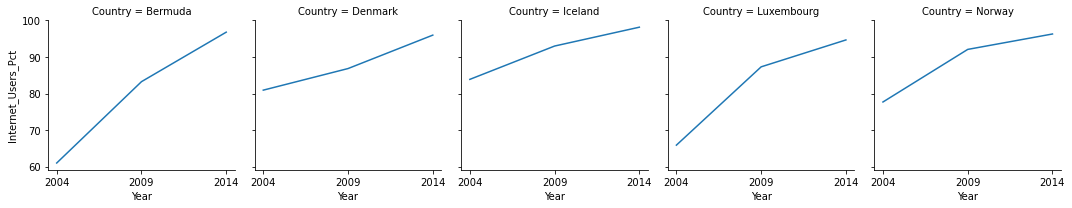

In [50]:
g = sns.FacetGrid(top_5_internet, col='Country')
g.map(sns.lineplot, 'Year', 'Internet_Users_Pct')

30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [51]:
gdp_internet_2014.nsmallest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3087,Timor-Leste,2014,3264.568070,1.14
540,Burundi,2014,886.235777,1.38
1261,Guinea,2014,2061.760973,1.72
2256,Niger,2014,1127.615541,1.95
2122,Myanmar,2014,4020.037369,2.10


In [52]:
bottomfilter1 = gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])
bottomfilter2 = gdp_and_internet_use['Country'].isin(['Timor-Leste', 'Burundi', 'Guinea', 'Niger', 'Myanmar'])

In [53]:
bottom_5_internet = gdp_and_internet_use[bottomfilter1]
bottom_5_internet = gdp_and_internet_use[bottomfilter2]
bottom_5_internet = bottom_5_internet.sort_values(by=['Year', 'Country'])

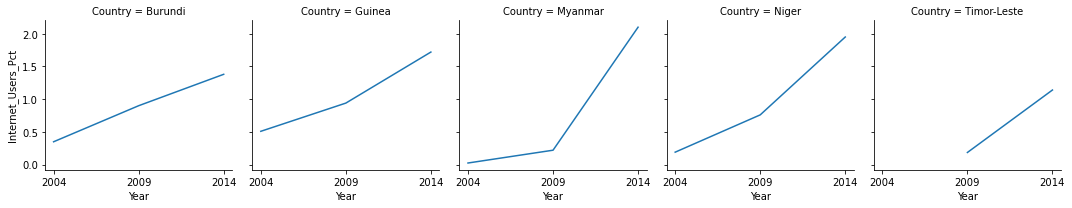

In [54]:
g = sns.FacetGrid(bottom_5_internet, col='Country')
g.map(sns.lineplot, 'Year', 'Internet_Users_Pct')

31. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [55]:
print(gdp_internet_2014.nlargest(5, 'GDP_Per_Capita'))

             Country  Year  GDP_Per_Capita  Internet_Users_Pct
1798      Luxembourg  2014   108760.916030               94.67
2542           Qatar  2014    95578.416973               91.49
2751       Singapore  2014    87808.663157               82.00
372          Bermuda  2014    77361.104881               96.80
627   Cayman Islands  2014    66207.447230               74.10


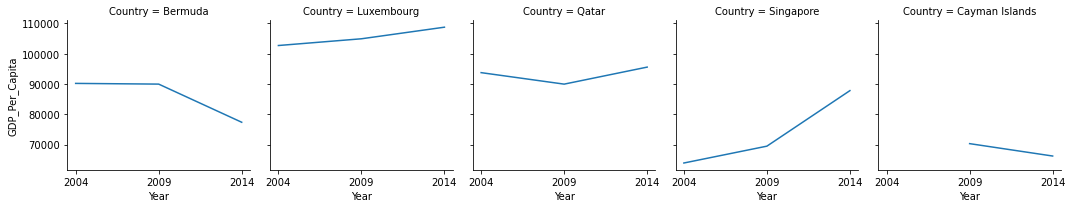

In [56]:
topgdpfilter1 = gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])
topgdpfilter2 = gdp_and_internet_use['Country'].isin(['Luxembourg', 'Qatar', 'Singapore', 'Bermuda', 'Cayman Islands'])
top_5_gdp = gdp_and_internet_use[topgdpfilter1]
top_5_gdp = gdp_and_internet_use[topgdpfilter2]
top_5_gdp = top_5_gdp.sort_values(by=['Year', 'Country'])
g = sns.FacetGrid(top_5_gdp, col='Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [57]:
print(gdp_internet_2014.nsmallest(5, 'GDP_Per_Capita'))

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
540      Burundi  2014      886.235777                1.38
1842      Malawi  2014     1027.208496                5.83
2256       Niger  2014     1127.615541                1.95
2102  Mozambique  2014     1217.090210                5.94
3098        Togo  2014     1404.132938                5.70


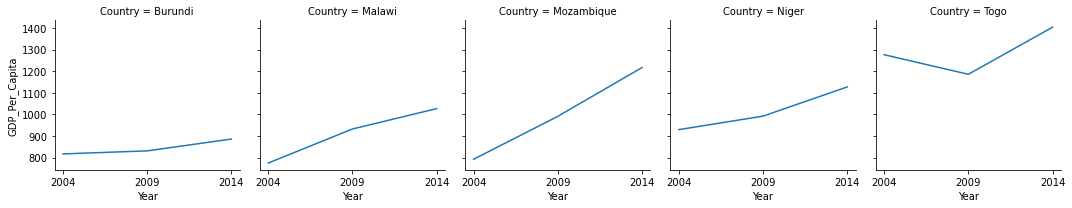

In [58]:
bottomgdpfilter1 = gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])
bottomgdpfilter2 = gdp_and_internet_use['Country'].isin(['Burundi', 'Malawi', 'Niger', 'Mozambique', 'Togo'])
bottom_5_gdp = gdp_and_internet_use[bottomgdpfilter1]
bottom_5_gdp = gdp_and_internet_use[bottomgdpfilter2]
bottom_5_gdp = bottom_5_gdp.sort_values(by=['Year', 'Country'])
g = sns.FacetGrid(bottom_5_gdp, col='Country')
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

Togo's GDP per capita went down between 2004 and 2009. Mozambique's GDP per capita has been on a steady, nearly 1:1 linear rise. 